In [226]:
import numpy as np

In [227]:
dia_hebra = 0.27 # mm
# 
F_hebra = 3.241 # kg
F_hebra_kg = F_hebra
F_hebra = 9.81*F_hebra # N
A_hebra = np.pi*(dia_hebra/2)**2
sigma_hebra = F_hebra/A_hebra # MPa

F_trenzado = 142# kg
F_trenzado_kg = F_trenzado
F_trenzado = 9.81*F_trenzado # N
dia_trenzado = 4 # mm

# 4 monofilamentos x 16 + 15 monofilamentos en alma
theta = 85 # grados
ctheta = np.sin(np.deg2rad(theta))
Nalma = 15
Atrenzado = (ctheta*16*4 + Nalma)*np.pi*(dia_hebra/2)**2 
sigma_trenzado = F_trenzado/Atrenzado # MPa

# homogenized 
Atrenzado_homogenized = np.pi*(dia_trenzado/2)**2
sigma_trenzado_homogenized = F_trenzado/Atrenzado_homogenized # MPa
# print with 2 decimals
print(f"sigma_trenzado = {sigma_trenzado:.2f} MPa")
print(f"sigma_hebra = {sigma_hebra:.2f} MPa")
print(f"sigma_trenzado_homogenized = {sigma_trenzado_homogenized:.2f} MPa")
# 
# ratio 
ratio = sigma_trenzado/sigma_hebra
print(f"ratio = {ratio:.3f}")

sigma_trenzado = 308.93 MPa
sigma_hebra = 555.30 MPa
sigma_trenzado_homogenized = 110.85 MPa
ratio = 0.556


In [228]:
from tools.step.runstep import runstep,address,lj
import os


In [229]:
import glob

In [230]:
files = glob.glob('output/*.json')

In [231]:
file = files[-2]

In [232]:
id_sim = os.path.basename(file).replace('.json','')

In [233]:
id_sim


'2024-09-17__10-47-55__22415'

In [234]:
params_sim = lj(id_sim)
params = lj(params_sim["dependencies"]["post_path"])

In [235]:
from matplotlib import pyplot as plt
import numpy as np

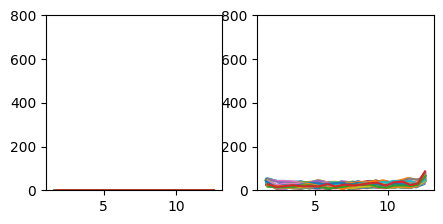

In [236]:

nms = len(params["results"]["measurements"])
nnsqrt_plots = np.ceil(np.sqrt(nms))
# int 
nnsqrt_plots = int(nnsqrt_plots)
fig = plt.figure(figsize=(5, 5))


for i in range(nms):
    plt.subplot(nnsqrt_plots, nnsqrt_plots, i+1)
    mt = params["results"]["measurements"][i]["mt"]
    mt_z = params["results"]["measurements"][i]["mt_z"]
    for imt,imt_z in zip(mt,mt_z):
        plt.plot(imt_z, imt)

    plt.ylim(0,800)

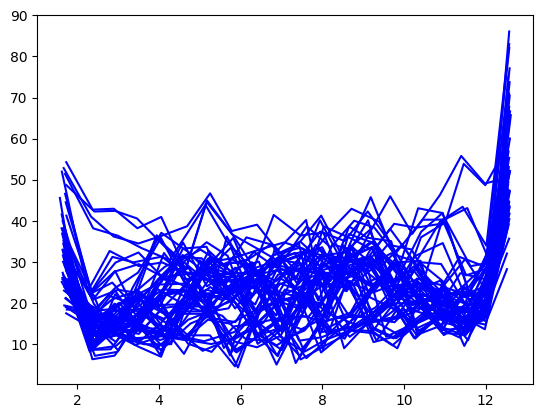

In [237]:
iter = 0
for imt,imt_z in zip(mt,mt_z):
    if iter > 63:
        color = 'red'
    else:
        color = 'blue'
    plt.plot(imt_z, imt, color=color)
    iter += 1

In [238]:
steps = params["results"]["frd"]["steps"]
step_str =  [ i[:7 ] for i in steps ]
step_str = np.array(step_str)    
step_str_uq = np.unique(step_str)

indx = [ np.where(step_str == iuq )[-1][-1] for iuq in step_str_uq]


sigma_max = [i["sigma_max"] for i in params["results"]["measurements"]]
epsilon = [i["epsilon"] for i in params["results"]["measurements"]]
Ftotal = [i["F_total"] for i in params["results"]["measurements"]]

sigma_max = np.array(sigma_max)
sigma_max = sigma_max[indx]
epsilon = np.array(epsilon)
epsilon = epsilon[indx]
Ftotal = np.array(Ftotal)/9.81 # kg
Ftotal = Ftotal[indx]

step_str_uq = step_str[indx]

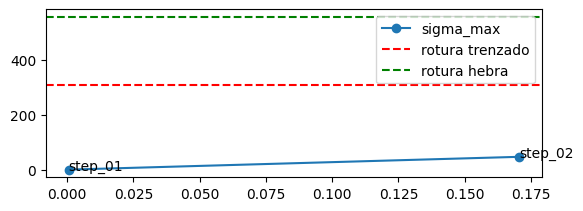

In [239]:
plt.subplot(2,1,1)

plt.plot(epsilon,sigma_max,label="sigma_max",marker="o")

#  MPa rotura trenzado 
# horizontal line
plt.axhline(y=sigma_trenzado, color='r', linestyle='--',label="rotura trenzado")
# MPa rotura hebra
plt.axhline(y=sigma_hebra, color='g', linestyle='--',label="rotura hebra")
for i,isteps in enumerate(step_str_uq):
    plt.text(epsilon[i], sigma_max[i], str(isteps))
plt.legend()





In [240]:
F_trenzado_kg

142

In [241]:
Ftotal

array([9.56379004e-04, 2.27852281e+00])

In [242]:
angle = 70
ctheta = np.sin(np.deg2rad(angle))
Ftotal_correrted = Ftotal*((64*ctheta+Nalma)/64*ctheta)

In [243]:
Ftotal_correrted

array([1.05513726e-03, 2.51380918e+00])

In [244]:
((64*ctheta+Nalma)/64*ctheta)

1.1032626795561862

In [245]:
import matplotlib.pyplot as plt


In [246]:
Feq = np.array([2.95686608, 3.5608765 , 3.96628467])

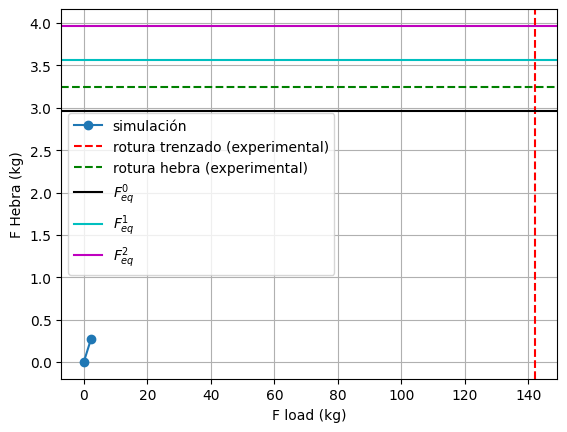

In [247]:
# linear regression

Fmax =  sigma_max*A_hebra/9.81
plt.plot(Ftotal,Fmax,label="simulación",marker="o")

#horizontal line
plt.axvline(x=F_trenzado_kg, color='r', linestyle='--',label="rotura trenzado (experimental)")
#homogenized
# plt.axvline(x=sigma_trenzado_homogenized, color='b', linestyle='--',label="rotura trenzado (homogenized)")
#horizontal line
plt.axhline(y=F_hebra_kg, color='g', linestyle='--',label="rotura hebra (experimental)")
#
k = -1
colors = ['k','c','m']
for iFeq in Feq:
    k += 1
    plt.axhline(y=iFeq, color=colors[k], linestyle='-',
                label=r"$F_{eq}^{%d}$"%(k))
plt.ylabel("F Hebra (kg)")
plt.xlabel("F load (kg)")
plt.grid()
plt.legend()


4mm más alma	540	3,25	16	4	17,5	32	183	172	 	 	No rompe el alma
5mmm	        540	3,25	16	5	0	32	180	168	 	 	Rompe al completo

In [248]:
# Ref           Denier  
# 4mm normal	540	    3,25	16	4	15	34	190	    175	 	 	Rompe al completo
# 4mm sin alma	540	    3,25	16	4	0	34	232,5	142	 	 	Rompe al completo

In [249]:
F_trenzado_kg_sin_alma = 142

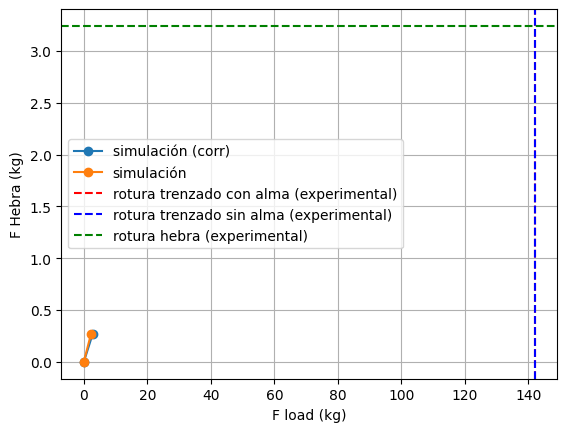

In [250]:
# linear regression

Fmax =  sigma_max*A_hebra/9.81
plt.plot(Ftotal*(15 + 64)/(64),Fmax,label="simulación (corr)",marker="o")
plt.plot(Ftotal,Fmax,label="simulación",marker="o")

#horizontal line
plt.axvline(x=F_trenzado_kg, color='r', linestyle='--',label="rotura trenzado con alma (experimental)")
plt.axvline(x=F_trenzado_kg_sin_alma, color='b', linestyle='--',label="rotura trenzado sin alma (experimental)")
#homogenized
# plt.axvline(x=sigma_trenzado_homogenized, color='b', linestyle='--',label="rotura trenzado (homogenized)")
#horizontal line
plt.axhline(y=F_hebra_kg, color='g', linestyle='--',label="rotura hebra (experimental)")
#

plt.ylabel("F Hebra (kg)")
plt.xlabel("F load (kg)")
plt.grid()
plt.legend()

In [251]:
F_trenzado_kg_sin_alma/F_trenzado_kg

1.0

In [252]:
64/(64+15)

0.810126582278481